In [5]:
import tensorflow as tf
import scipy.misc as misc
import os
import numpy as np
import matplotlib.pyplot as plt
from patchify import patchify, unpatchify, gauss2D
%matplotlib inline

In [3]:
imageDir = os.path.expanduser('~/Documents/data/igarssTrainingAndTestingData/imageFiles')
imageFileName = '11ska595800{}'
image = misc.imread(os.path.join(imageDir,imageFileName.format('.png')))
image4D = image.reshape((1,)+image.shape)

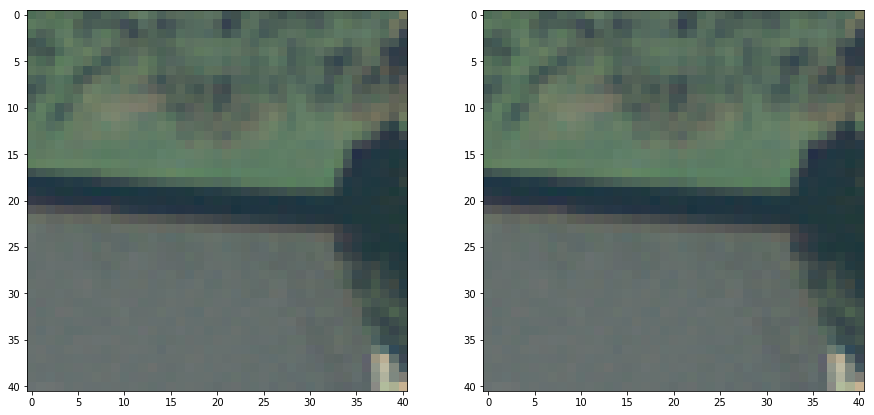

In [27]:
PATCH_SIZE = 41
n=0
m=50
with tf.Session() as sess:
    patches = tf.extract_image_patches(images=image4D, ksizes=[1, PATCH_SIZE, PATCH_SIZE, 1], strides=[1, 41, 41, 1], rates=[1, 1, 1, 1], padding="VALID").eval()
    patches_reshape = np.reshape(patches, [-1, PATCH_SIZE, PATCH_SIZE, 3])
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,15))
    ax1.imshow(np.squeeze(patches_reshape[n*41+m, :, :, :]))
    ax2.imshow(np.squeeze(image[41*n:41*(n+1),41*m:41*(m+1),:]))

In [6]:
patch_size = 41
step = 20
imageDir = os.path.expanduser('~/Documents/data/igarssTrainingAndTestingData/imageFiles')
imageFileName = '11ska595800{}'
one_image = misc.imread(os.path.join(imageDir,imageFileName.format('.png')))
image_size = one_image.shape
# image4D = one_image.reshape((1,)+one_image.shape)
patches = patchify(one_image, patch_size,step)

gfilter = gauss2D(shape=[patch_size,patch_size], sigma=(patch_size-1)/4)

patches_weighted = patches*gfilter[None, :, :, None]

image_weighted_rec = unpatchify(patches_weighted, image_size, step)
gfilter_rec = unpatchify(np.ones(patches.shape)*gfilter[None, :, :, None], image_size, step)

image_weighted_normalized = image_weighted_rec/gfilter_rec

/home/helios/anaconda3/envs/TF/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in true_divide


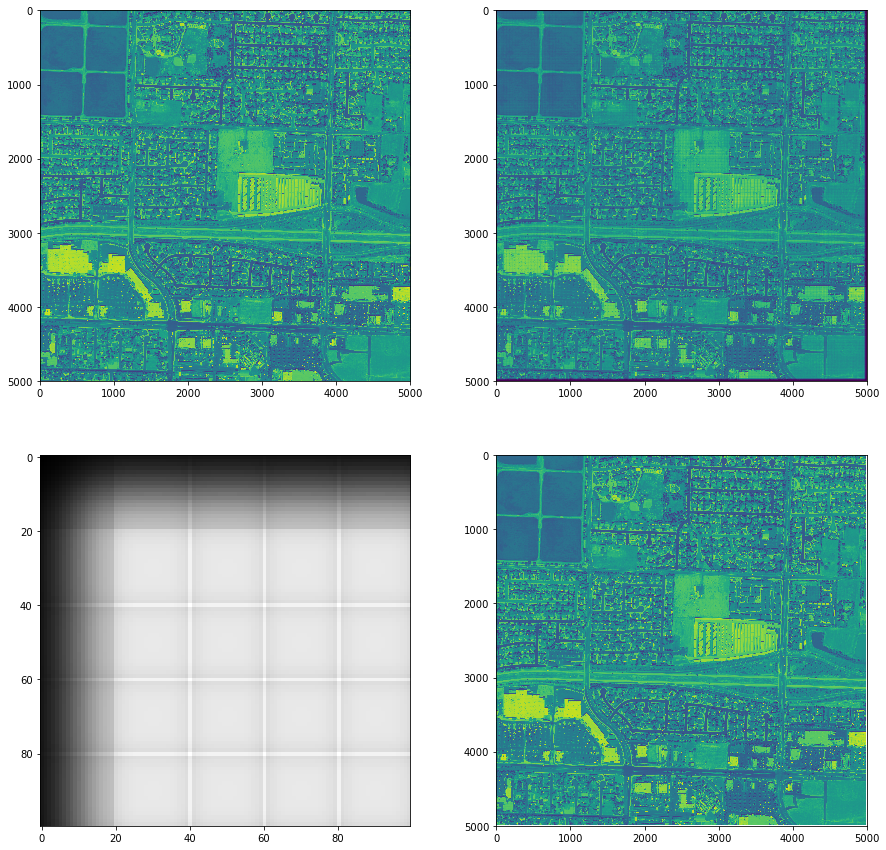

In [13]:
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.imshow(one_image[:,:, 1])
plt.subplot(222)
plt.imshow(image_weighted_rec[:,:, 1])
plt.subplot(223)
plt.imshow(gfilter_rec[0:100,0:100, 1],cmap = plt.cm.gray)
plt.subplot(224)
plt.imshow(image_weighted_normalized[:,:, 1])
plt.show()

In [17]:
np.min(np.ones(patches.shape)*gfilter[None, :, :, None])

3.1648571715679863e-05